In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Amp1 reg line.png',
 'Amp10 reg line.png',
 'Amp4 reg line.png',
 'Amp5 reg line.png',
 'Amp9 reg line.png',
 'compiled primer runs 2 to 5.csv',
 'compiled primer runs 2 to 5.ipynb',
 'compiled primer runs 2 to 5.xlsx',
 'compiledPlots.png',
 'lin plasmid 1 to 10.ipynb',
 'lin plasmid 1to10.csv']

In [219]:
df = pd.read_csv('lin plasmid 1to10.csv')

In [220]:
df

,Amp,Conc (fg/ul),Well,Well Position,Task,CT,Quantity
0,1,1000000.0,15,B3,STANDARD,17.827,NaN
1,1,1000000.0,16,B4,STANDARD,17.858,NaN
2,1,100000.0,27,C3,STANDARD,21.327,NaN
3,1,100000.0,28,C4,STANDARD,21.314,NaN
4,1,10000.0,39,D3,STANDARD,24.571,NaN
...,...,...,...,...,...,...,...
103,10,1000.0,58,E10,STANDARD,18.948,NaN
104,10,100.0,69,F9,STANDARD,22.273,NaN
105,10,100.0,70,F10,STANDARD,22.522,NaN
106,10,0.0,81,G9,NTC,Undetermined,NaN


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Amp            108 non-null    int64  
 1   Conc (fg/ul)   108 non-null    float64
 2   Well           108 non-null    int64  
 3   Well Position  108 non-null    object 
 4   Task           108 non-null    object 
 5   CT             108 non-null    object 
 6   Quantity       0 non-null      float64
dtypes: float64(2), int64(2), object(3)
memory usage: 6.0+ KB


In [222]:
df.columns

Index(['Amp', 'Conc (fg/ul)', 'Well', 'Well Position', 'Task', 'CT',
       'Quantity'],
      dtype='object')

In [223]:
df.columns.isin(['Amp', 'Conc (fg/ul)', 'CT'])

array([ True,  True, False, False, False,  True, False])

In [224]:
df = df.drop(['Well', 'Well Position', 'Task','Quantity'], axis =1)

In [225]:
df

,Amp,Conc (fg/ul),CT
0,1,1000000.0,17.827
1,1,1000000.0,17.858
2,1,100000.0,21.327
3,1,100000.0,21.314
4,1,10000.0,24.571
...,...,...,...
103,10,1000.0,18.948
104,10,100.0,22.273
105,10,100.0,22.522
106,10,0.0,Undetermined


In [226]:
df = df[df['Conc (fg/ul)'] != 0]

In [227]:
df.head(25)

,Amp,Conc (fg/ul),CT
0,1,1000000.0,17.827
1,1,1000000.0,17.858
2,1,100000.0,21.327
3,1,100000.0,21.314
4,1,10000.0,24.571
5,1,10000.0,24.798
6,1,1000.0,28.226
7,1,1000.0,28.184
8,1,100.0,31.402
9,1,100.0,31.948


In [228]:
df['Quantity'] = np.log10(df['Conc (fg/ul)']/1000)
# !!!!!!!!!!! Note: quantity is log10 concentration in ng/ul !!!!!!!!!!!!!

<ipython-input-228-da03401f933f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity'] = np.log10(df['Conc (fg/ul)']/1000)


In [229]:
df.head(20)

,Amp,Conc (fg/ul),CT,Quantity
0,1,1000000.0,17.827,3.0
1,1,1000000.0,17.858,3.0
2,1,100000.0,21.327,2.0
3,1,100000.0,21.314,2.0
4,1,10000.0,24.571,1.0
5,1,10000.0,24.798,1.0
6,1,1000.0,28.226,0.0
7,1,1000.0,28.184,0.0
8,1,100.0,31.402,-1.0
9,1,100.0,31.948,-1.0


In [231]:
df['CT'] = df['CT'].astype(float)

<ipython-input-231-68de929bc5ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CT'] = df['CT'].astype(float)


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 105
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Amp           90 non-null     int64  
 1   Conc (fg/ul)  90 non-null     float64
 2   CT            90 non-null     float64
 3   Quantity      90 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 3.5 KB


In [233]:
df.groupby(by=['Amp','Quantity']).mean().loc[[1,4,5,9,10]]

Conc (fg/ul)       CT
Amp Quantity                       
1   -1.0             100.0  31.6750
     0.0            1000.0  28.2050
     1.0           10000.0  24.6845
     2.0          100000.0  21.3205
     3.0         1000000.0  17.8425
4   -1.0             100.0  21.8690
     0.0            1000.0  18.5055
     1.0           10000.0  15.3260
     2.0          100000.0  11.8135
     3.0         1000000.0   8.4000
5   -1.0             100.0  22.0000
     0.0            1000.0  18.6150
     1.0           10000.0  15.3505
     2.0          100000.0  11.8740
     3.0         1000000.0   8.4360
9   -1.0             100.0  22.3055
     0.0            1000.0  18.9285
     1.0           10000.0  15.5600
     2.0          100000.0  12.1270
     3.0         1000000.0   8.5305
10  -1.0             100.0  22.3975
     0.0            1000.0  18.9090
     1.0           10000.0  15.6420
     2.0          100000.0  12.2425
     3.0         1000000.0   8.6785

In [234]:
df_145910 = df.groupby(by=['Amp','Quantity']).mean().loc[[1,4,5,9,10]]

In [235]:
df_145910

Conc (fg/ul)       CT
Amp Quantity                       
1   -1.0             100.0  31.6750
     0.0            1000.0  28.2050
     1.0           10000.0  24.6845
     2.0          100000.0  21.3205
     3.0         1000000.0  17.8425
4   -1.0             100.0  21.8690
     0.0            1000.0  18.5055
     1.0           10000.0  15.3260
     2.0          100000.0  11.8135
     3.0         1000000.0   8.4000
5   -1.0             100.0  22.0000
     0.0            1000.0  18.6150
     1.0           10000.0  15.3505
     2.0          100000.0  11.8740
     3.0         1000000.0   8.4360
9   -1.0             100.0  22.3055
     0.0            1000.0  18.9285
     1.0           10000.0  15.5600
     2.0          100000.0  12.1270
     3.0         1000000.0   8.5305
10  -1.0             100.0  22.3975
     0.0            1000.0  18.9090
     1.0           10000.0  15.6420
     2.0          100000.0  12.2425
     3.0         1000000.0   8.6785

In [236]:
df_145910.index

MultiIndex([( 1, -1.0),
            ( 1,  0.0),
            ( 1,  1.0),
            ( 1,  2.0),
            ( 1,  3.0),
            ( 4, -1.0),
            ( 4,  0.0),
            ( 4,  1.0),
            ( 4,  2.0),
            ( 4,  3.0),
            ( 5, -1.0),
            ( 5,  0.0),
            ( 5,  1.0),
            ( 5,  2.0),
            ( 5,  3.0),
            ( 9, -1.0),
            ( 9,  0.0),
            ( 9,  1.0),
            ( 9,  2.0),
            ( 9,  3.0),
            (10, -1.0),
            (10,  0.0),
            (10,  1.0),
            (10,  2.0),
            (10,  3.0)],
           names=['Amp', 'Quantity'])

In [237]:
df_145910.index.get_level_values(0) # this is how you get the index values; specify the level of the index
# starting from 0. so if you pass in 0, then you will get back the values in the 'Amp' column

Int64Index([1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 10, 10,
            10, 10, 10],
           dtype='int64', name='Amp')

In [238]:
df_145910.loc[df_145910.index.get_level_values(0) == 1]
# this is how you do 'subsetting' for a multilevel index
# have to use the .loc[] and .index.get_level_values() methods

# alternatively, can use .loc[], and pass in the value of the level if your know what it is

Conc (fg/ul)       CT
Amp Quantity                       
1   -1.0             100.0  31.6750
     0.0            1000.0  28.2050
     1.0           10000.0  24.6845
     2.0          100000.0  21.3205
     3.0         1000000.0  17.8425

In [239]:
amps = df_145910.index.get_level_values(0).unique()
qty = df_145910.index.get_level_values(1).unique()

In [240]:
print(amps)
print(qty)

Int64Index([1, 4, 5, 9, 10], dtype='int64', name='Amp')
Float64Index([-1.0, 0.0, 1.0, 2.0, 3.0], dtype='float64', name='Quantity')


In [241]:
dict_amp = {}
for amp in amps:
    print('Amplicon ' + str(amp))
    dict_amp['Amp'+str(amp)] = df_145910.loc[df_145910.index.get_level_values(0) == amp]
    print(dict_amp['Amp'+str(amp)])

Amplicon 1
              Conc (fg/ul)       CT
Amp Quantity                       
1   -1.0             100.0  31.6750
     0.0            1000.0  28.2050
     1.0           10000.0  24.6845
     2.0          100000.0  21.3205
     3.0         1000000.0  17.8425
Amplicon 4
              Conc (fg/ul)       CT
Amp Quantity                       
4   -1.0             100.0  21.8690
     0.0            1000.0  18.5055
     1.0           10000.0  15.3260
     2.0          100000.0  11.8135
     3.0         1000000.0   8.4000
Amplicon 5
              Conc (fg/ul)       CT
Amp Quantity                       
5   -1.0             100.0  22.0000
     0.0            1000.0  18.6150
     1.0           10000.0  15.3505
     2.0          100000.0  11.8740
     3.0         1000000.0   8.4360
Amplicon 9
              Conc (fg/ul)       CT
Amp Quantity                       
9   -1.0             100.0  22.3055
     0.0            1000.0  18.9285
     1.0           10000.0  15.5600
     2.0          10

In [242]:
dict_amp['Amp1']['Conc (fg/ul)']

Amp  Quantity
1    -1.0            100.0
      0.0           1000.0
      1.0          10000.0
      2.0         100000.0
      3.0        1000000.0
Name: Conc (fg/ul), dtype: float64

In [243]:
# testing syntax
slope, intercept, r_value, p_value, std_err = stats.linregress(x = qty,
                                                               y = dict_amp['Amp1']['CT'])

In [244]:
reg_stat = {}
for amp in amps:
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        x = qty,
        y = dict_amp['Amp'+str(amp)]['CT']
    )
    reg_stat['Amp'+str(amp)] = (slope, intercept, r_value, p_value, std_err)

In [245]:
reg_stats = pd.DataFrame.from_dict(reg_stat, orient='index',columns=('slope', 'intercept', 'r_value', 'p_value', 'std_err'))

In [246]:
reg_stats

,slope,intercept,r_value,p_value,std_err
Amp1,-3.45495,28.20045,-0.999979,1.174936e-07,0.013001
Amp4,-3.36300,18.54580,-0.999881,1.563342e-06,0.029989
Amp5,-3.38690,18.64200,-0.999944,4.973307e-07,0.020616
Amp9,-3.43515,18.92545,-0.999911,1.012846e-06,0.026505
Amp10,-3.41045,18.98435,-0.999905,1.112966e-06,0.027155


In [247]:
dict_amp['Amp'+str(1)].index.get_level_values(1)

Float64Index([-1.0, 0.0, 1.0, 2.0, 3.0], dtype='float64', name='Quantity')

<AxesSubplot:xlabel='Quantity', ylabel='CT'>

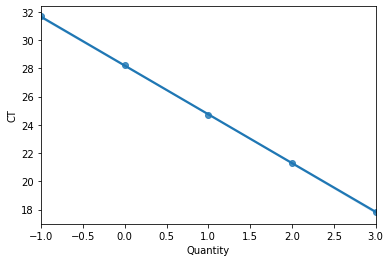

In [248]:
# testing syntax
sns.regplot(data=dict_amp['Amp'+str(1)],
        x=dict_amp['Amp'+str(1)].index.get_level_values(1),
        y=dict_amp['Amp'+str(1)]['CT']
         # defining the axes of the plot to the ax value that we zipped
        )

In [251]:
amps

Int64Index([1, 4, 5, 9, 10], dtype='int64', name='Amp')

i value is 1
1
ax value is AxesSubplot(0.125,0.657941;0.352273x0.222059)
i value is 4
4
ax value is AxesSubplot(0.547727,0.657941;0.352273x0.222059)
i value is 5
5
ax value is AxesSubplot(0.125,0.391471;0.352273x0.222059)
i value is 9
9
ax value is AxesSubplot(0.547727,0.391471;0.352273x0.222059)
i value is 10
10
ax value is AxesSubplot(0.125,0.125;0.352273x0.222059)


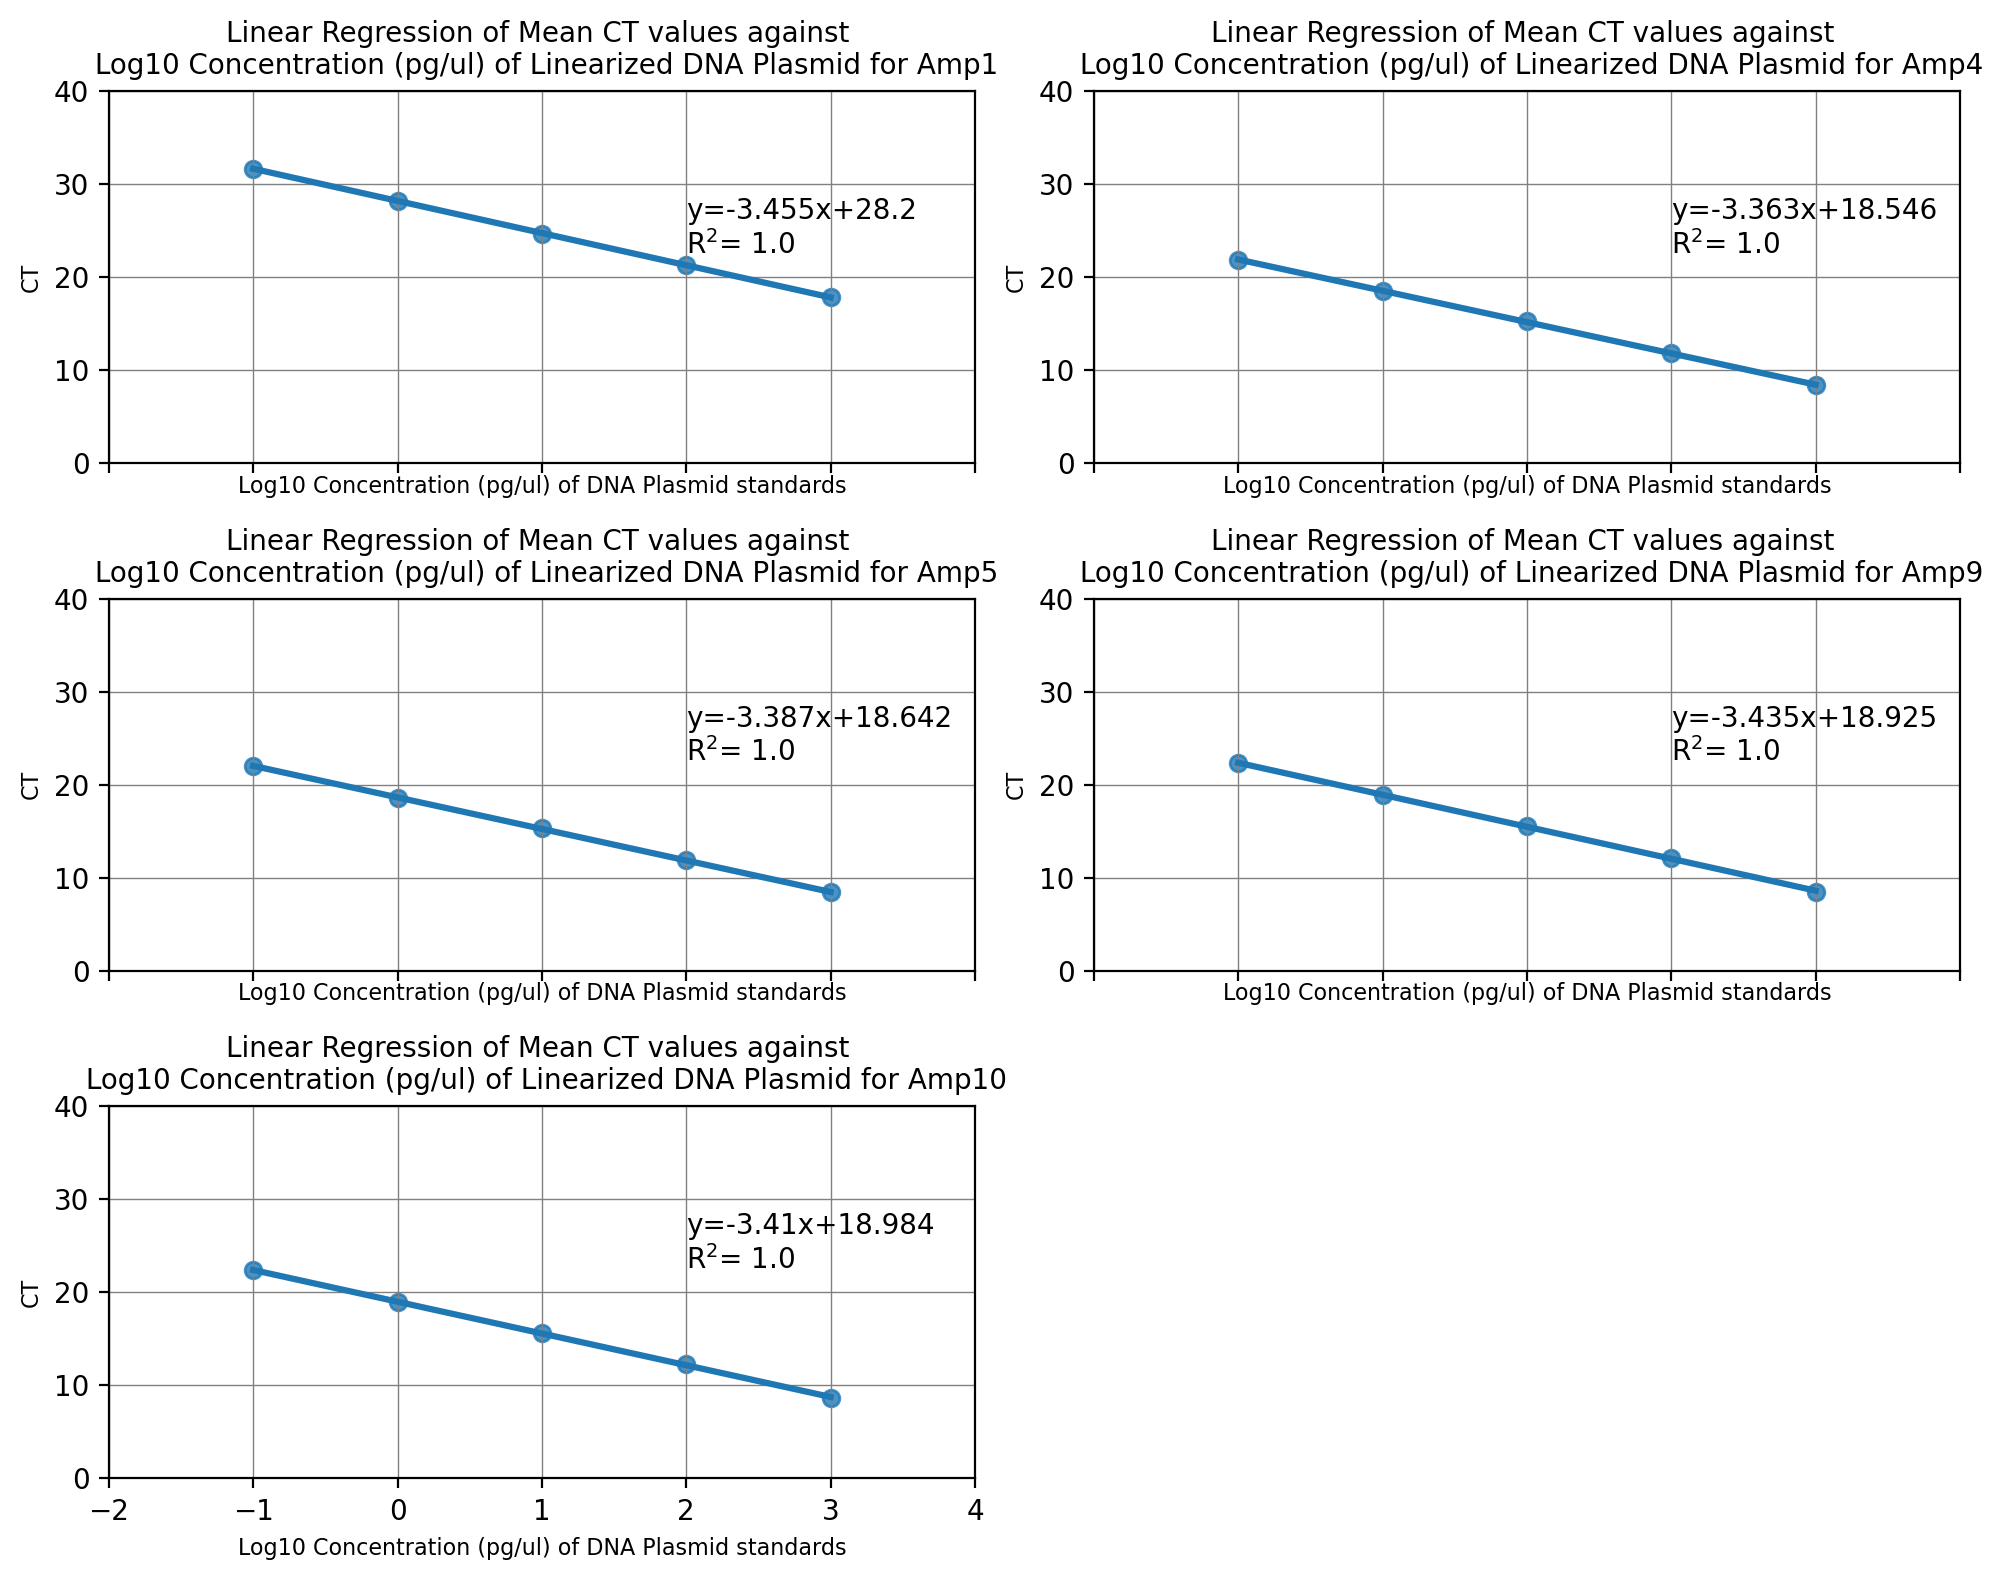

In [278]:
## plots with subplots with loop #

# defining a subplot object with 3 rows and 2 column; enabled tight_layout to ensure axes appear properly;
# note that there will be 1 axes that is not populated and has to be deleted
fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(10,8),sharex=True,tight_layout=True,dpi=200)



# loop to create the plots
## here we are passing in 3 things to the for loop: the flattened array of the axs 'ax',
## the index 'n' and the Amplicon value 'i'. and we zip them up. note that since axs.revel() returns too many
## values, we have to define a 'sub-tuple' called (n,i)
for ax,(n,i) in zip(axs.ravel(),enumerate(amps)):
    print('i value is '+ str(i)) # check
    print(i) # check
    print('ax value is ' +str(ax)) # check
    
    # creating the plot
    sns.regplot(data='Amp'+str(i),
           x=dict_amp['Amp'+str(i)].index.get_level_values(1),
           y=dict_amp['Amp'+str(i)]['CT'],
            ax=ax # defining the axes of the plot to the ax value that we zipped
          )
    # setting the title
    ax.set_title('Linear Regression of Mean CT values against \n Log10 Concentration (pg/ul) of Linearized DNA Plasmid for Amp'+str(i),
                size=10)

    # showing the grid line
    ax.grid(which='major',
         axis='both',
        color='grey',
         linestyle='-',
         linewidth=0.5)
    
    # showing the regresion statistics
    ax.annotate("y={}x+{}\nR$^2$= {}".format(reg_stats['slope'][n].round(decimals=3),
                                         reg_stats['intercept'][n].round(decimals=3),
                                         -1 * reg_stats['r_value'][n].round(decimals=3)
                                        ),
             xy=(2,22.5)
            )
    
    # setting the axes limits
    plt.setp(ax,
             xlim = (-2,4),
             ylim= (0,40)
        )
    
    # setting the x label for all the graphs
    ax.set_xlabel('Log10 Concentration (pg/ul) of DNA Plasmid standards',
                 size = 8)
    ax.set_ylabel('CT',
                 size = 8)

# saving the plot
fig.delaxes(axs[2, 1]) # remvoes the last axes because there is an odd number of plots
plt.savefig('compiledPlots for lin plasmid 1 to 10.png')